<a href="https://colab.research.google.com/github/Shishukumar74/Extreme-points-in-coutours-with-OpenCV/blob/main/Finding_extreme_points_in_contours_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **libraries**

In [13]:
from matplotlib import pyplot as plt

In [1]:
import imutils
import cv2

# **Reading** **Image**

In [3]:
image = cv2.imread("/content/hand.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)

# **Perform** **Morphological** **Operations**

In [4]:
thresh = cv2.threshold(gray,45,255,cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh,None,iterations=2)
thresh = cv2.dilate(thresh,None,iterations=2)

# **Finding** **Counters**

In [7]:
cnts = cv2.findContours(thresh.copy(),
                        cv2.RETR_EXTERNAL,
                       cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[0]
c = max(cnts, key=cv2.contourArea)

# **Finding** **extreme** **left**, **right**, **top**, **bottom** **coordinates**

In [8]:
extLeft = tuple(c[c[:,:,0].argmin()][0])
extRight = tuple(c[c[:,:,0].argmax()][0])
extTop = tuple(c[c[:,:,1].argmin()][0])
extBot = tuple(c[c[:,:,1].argmax()][0])

# **Outline** **uploaded** **hand** **image**

In [ ]:
# draws outline of hand
cv2.drawContours(image, [c], -1, (0,255,255), 2)
# draws circle on extreme points
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)

# **Display** **image**

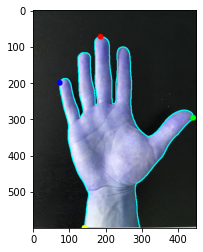

In [14]:
plt.imshow(image)
plt.show()